In [26]:
import pandas as pd
import numpy as np
import nltk
import json
import pickle
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator



pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('train_data.csv')
df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_face,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized
0,0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,NaN,katandandre mkr,NaN,NaN,NaN,"In words #katandandre, food crapilicious! #mkr",words food crapilicious,"['words', 'food', 'crapilicious']","[('words', 'NNS'), ('food', 'NN'), ('crapilicious', 'JJ')]","[('words', 'n'), ('food', 'n'), ('crapilicious', 'a')]","['word', 'food', 'crapilicious']"
1,1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,NaN,aussietv MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,NaN,NaN,NaN,Why #aussietv white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #Wonde...,white,['white'],"[('white', 'JJ')]","[('white', 'a')]",['white']
2,2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,NaN,NaN,XochitlSuckkks,NaN,NaN,@XochitlSuckkks classy whore? Or red velvet cupcakes?,classy whore red velvet cupcakes,"['classy', 'whore', 'red', 'velvet', 'cupcakes']","[('classy', 'NN'), ('whore', 'NN'), ('red', 'JJ'), ('velvet', 'NN'), ('cupcakes', 'NNS')]","[('classy', 'n'), ('whore', 'n'), ('red', 'a'), ('velvet', 'n'), ('cupcakes', 'n')]","['classy', 'whore', 'red', 'velvet', 'cupcake']"
3,3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,NaN,NaN,Jason_Gio,NaN,NaN,"@Jason_Gio meh. :P thanks heads up, concerned another angry dude twitter.",meh thanks heads concerned another angry dude twitter,"['meh', 'thanks', 'heads', 'concerned', 'another', 'angry', 'dude', 'twitter']","[('meh', 'JJ'), ('thanks', 'NNS'), ('heads', 'NNS'), ('concerned', 'VBD'), ('another', 'DT'), ('...","[('meh', 'a'), ('thanks', 'n'), ('heads', 'n'), ('concerned', 'v'), ('another', 'n'), ('angry', ...","['meh', 'thanks', 'head', 'concern', 'another', 'angry', 'dude', 'twitter']"
4,4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,NaN,NaN,RudhoeEnglish,NaN,NaN,"@RudhoeEnglish This ISIS account pretending Kurdish account. Like Islam, lies.",isis account pretending kurdish account like islam lies,"['isis', 'account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']","[('isis', 'NN'), ('account', 'NN'), ('pretending', 'VBG'), ('kurdish', 'JJ'), ('account', 'NN'),...","[('isis', 'n'), ('account', 'n'), ('pretending', 'v'), ('kurdish', 'a'), ('account', 'n'), ('lik...","['isi', 'account', 'pretend', 'kurdish', 'account', 'like', 'islam', 'lie']"


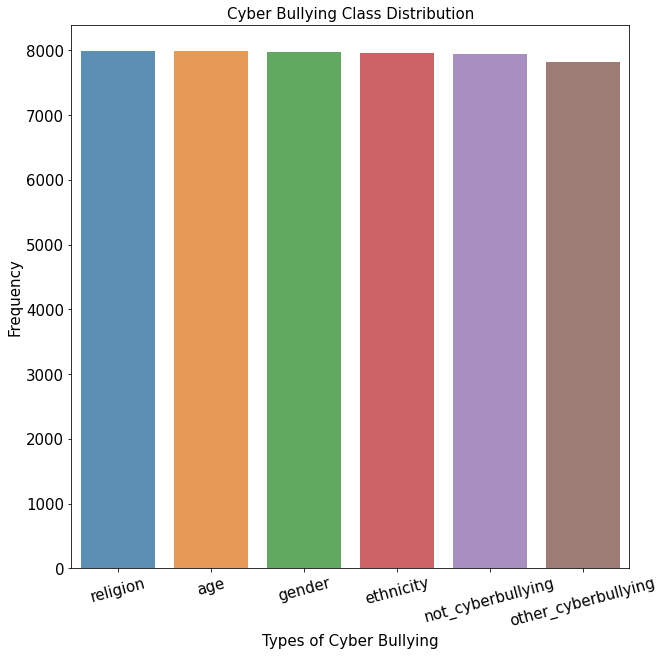

In [4]:
cyber_bull = df['cyberbullying_type'].value_counts()
index = cyber_bull.sort_index()
plt.figure(figsize=(10,10))

sns.barplot(cyber_bull.index, cyber_bull.values, alpha=0.8)
plt.title("Cyber Bullying Class Distribution", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Types of Cyber Bullying', fontsize=15)
plt.xticks(fontsize=15,rotation =15);

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']] # make the list into a string
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split())) # count words

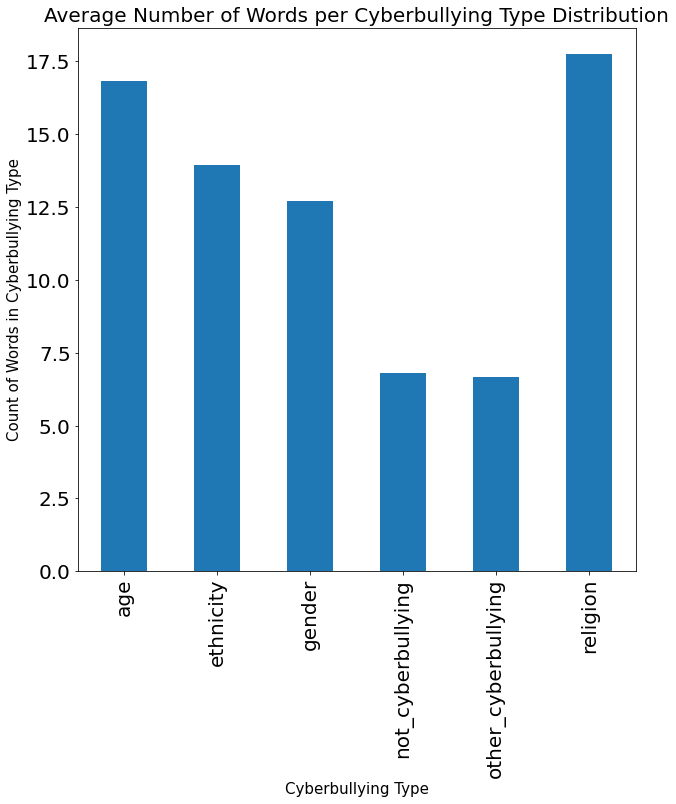

In [6]:
word_avg = df.groupby('cyberbullying_type')['word_count'].mean().plot(kind='bar', figsize=(10,10))
plt.xlabel('Cyberbullying Type', fontsize=15)
plt.ylabel('Count of Words in Cyberbullying Type', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Words per Cyberbullying Type Distribution', fontsize=20)
plt.show()

### Term Frequency Analysis

In [94]:
def most_common(number, class_name = None):
    allwords = []
    if class_name is None:
        title = f'Top {number} Most Common Words in the data'
        words = df['lemmatized'].str.replace("'","").str.strip('[]').str.split(', ')
        for wordlist in words:
            allwords += wordlist
    else:
        title = f'Top {number} Most Common Words in Class {class_name}'
        words = df.query(f'cyberbullying_type=="{class_name}"')['lemmatized'].str.replace("'","").str.strip('[]').str.split(', ')
        for wordlist in words:
            allwords += wordlist

    mostcommon = FreqDist(allwords).most_common(number)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(10,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.show()
    return "====================="
    

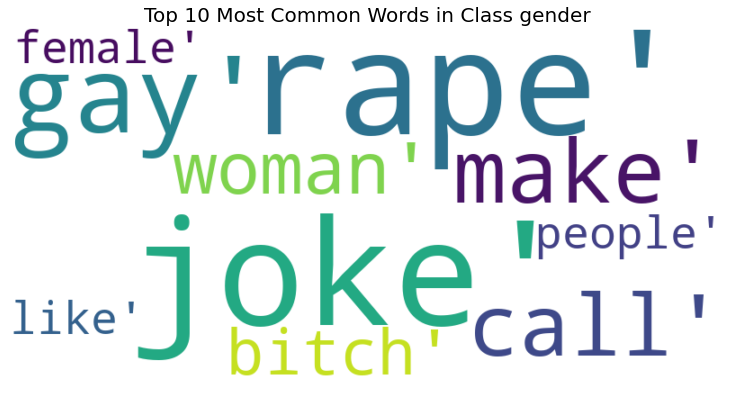

'====================='

In [95]:
most_common( 10, 'gender')

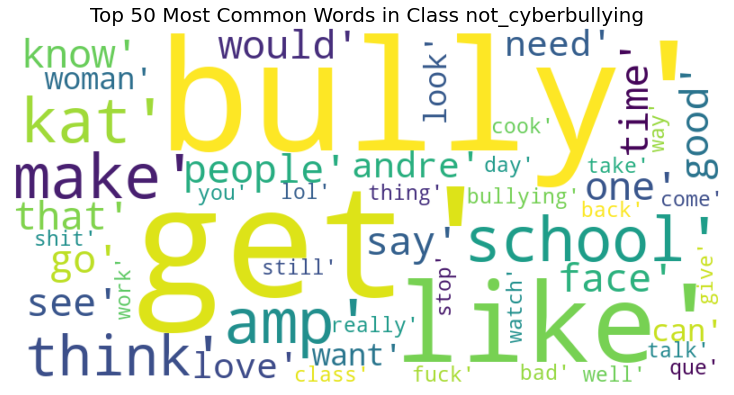

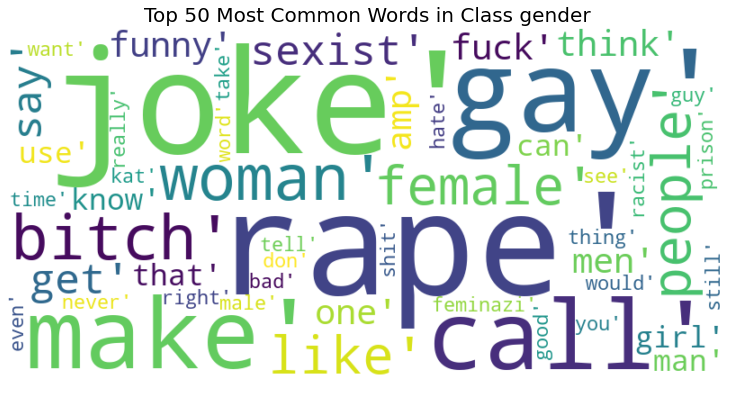

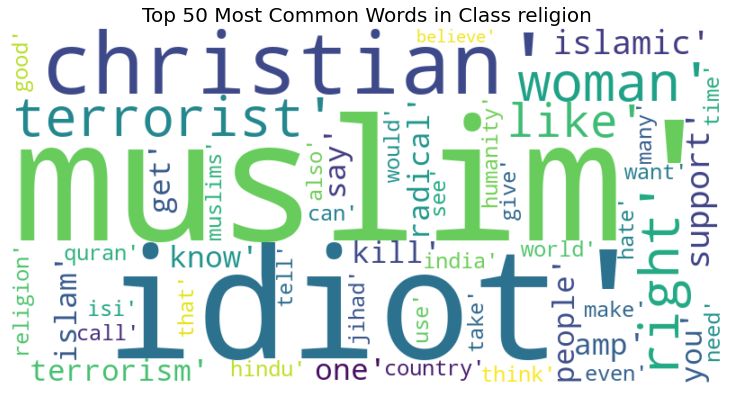

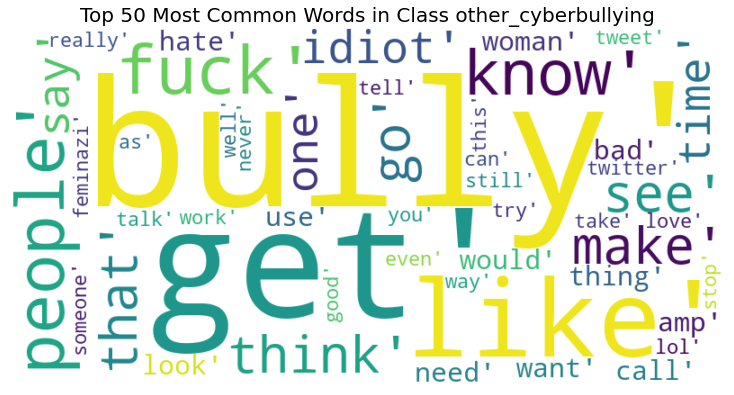

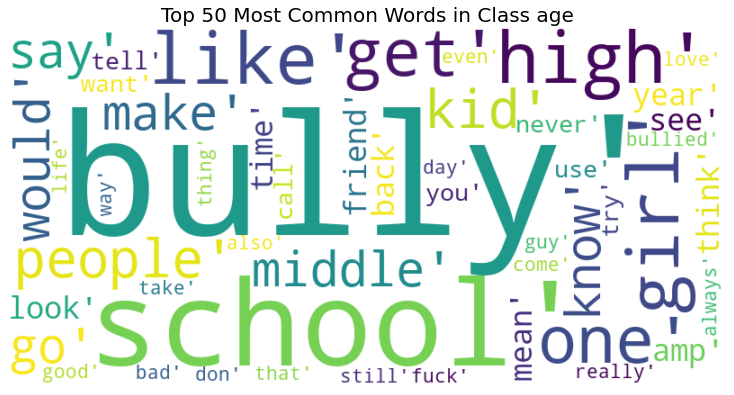

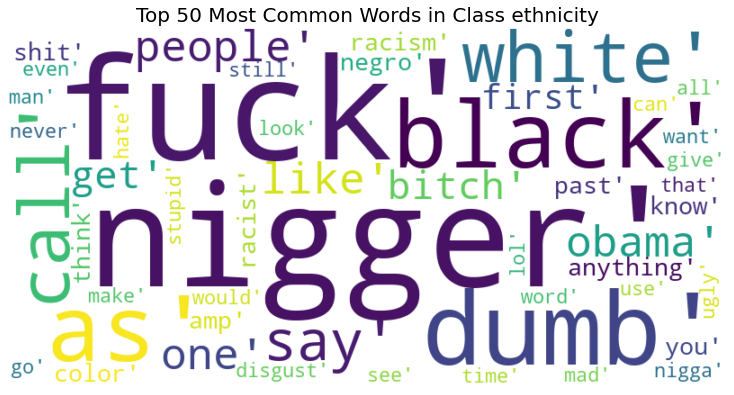

In [97]:
for class_name in list(df['cyberbullying_type'].unique()):
    print(most_common( 50, class_name))

## Topic Modeling